<a href="https://colab.research.google.com/github/saurabhdburde/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

#### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

#### <b> The df contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

<br>
<br>
<br>
<br>

#<b><u> 1. Import Required Libraries</b>

In [1]:
# Import all libraries
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                # linear algebra
import matplotlib.pyplot as plt   # ploting the data
import seaborn as sns             # ploting the data
import math                       # calculation
from matplotlib import rcParams   # runtime configuration settings
%matplotlib inline

import pylab

from datetime import datetime
import calendar

from scipy import stats
import missingno as msno

import warnings                 
warnings.filterwarnings('ignore') # Ignore unnecessary warnings

# figure size in inches
rcParams['figure.figsize'] = 15,8


from sklearn.preprocessing import LabelEncoder

### Display the values on a barplot

In [2]:
# the following function to display the values on a seaborn barplot
def show_values(axs, orient="v", space=.01):
  """
  function to display the values on a seaborn barplot
  """
  # Create a another function to pass plot name
  def _single(ax):
    # if Plot is Vertical 
    if orient == "v":
        for p in ax.patches:
          # Patches are Artists with a face color and an edge color.
          # We are using it to get hight and width of the bar or count plot
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + (p.get_height()*0.02)
            value = '{:.1f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    # if plot is horizontal
    elif orient == "h":
        for p in ax.patches:
          # Patches are Artists with a face color and an edge color.
          # We are using it to get hight and width of the bar or count plot
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            value = '{:.1f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

  # function returns True if the specified object is of the np.ndarray type, otherwise False . 
  if isinstance(axs, np.ndarray):
    # Multidimensional index iterator. Return an iterator yielding pairs of array coordinates and values.
    for idx, ax in np.ndenumerate(axs):
        _single(ax)
  else:
    _single(axs)

<br>
<br>
<br>
<br>

#<b><u> 2. Importation and Exploration of AirBnb NYC df</u></b>




### [ i ] - Import df

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
data = pd.read_csv('/content/drive/MyDrive/Alma Better Capstone Projects/CP2-Bike Sharing Demand Prediction/Data _ Resources/SeoulBikeData.csv',encoding= 'unicode_escape').replace([np.inf, -np.inf], np.nan)

### [ ii ] - Overview Of df

In [74]:
# Top 5 records
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [75]:
# Size of df
print('\nSize of the df:-')
print(f' <o>  Number of Features (Columns) in df are {data.shape[1]}.')
print(f' <o>  Number of Records (Rows) in df are {data.shape[0]}.')


Size of the Dataset:-
 <o>  Number of Features (Columns) in dataset are 14.
 <o>  Number of Records (Rows) in dataset are 8760.


In [76]:
# Data Description
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [77]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [78]:
# Unique values are present for each Feature.
print('\nUnique Values for each individual Columns:-\n\n', data.nunique())


Unique Values for each individual Columns:-

 Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


In [79]:
# Count missing values for each column of the data
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [80]:
df = data.copy()

<br>
<br>
<br>
<br>

#<b><u>Data Preprocessing</u></b>

## [ i ] - Creating new features Year, Month, Day using Date column from the df 

In [225]:
df["day"] = df.Date.apply(lambda x : int(x.split("/")[0]))
df["month"] = df.Date.apply(lambda x : int(x.split("/")[1]))
df["year"] = df.Date.apply(lambda x : int(x.split("/")[2]))
df["weekday"] = df.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%d/%m/%Y").weekday()])

In [226]:

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year,Date,Month,Month -> Season,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,01/12/2017,December,December-> Winter,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,01/12/2017,December,December-> Winter,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,01/12/2017,December,December-> Winter,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,01/12/2017,December,December-> Winter,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,01/12/2017,December,December-> Winter,Friday


In [83]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [84]:
df.drop("Date", axis=1, inplace=True)

In [85]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year'],
      dtype='object')

## EDA

In [25]:
# find All columns That Are Objects
Numeric_Features = df.dtypes[df.dtypes != 'object'].index
Numeric_Features[:]

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'day',
       'month', 'year'],
      dtype='object')



 Distribution and Bike Count Comparision Plot for Rented Bike Count
------------------------------------------------------------------------------------------------------------------------------------------------------


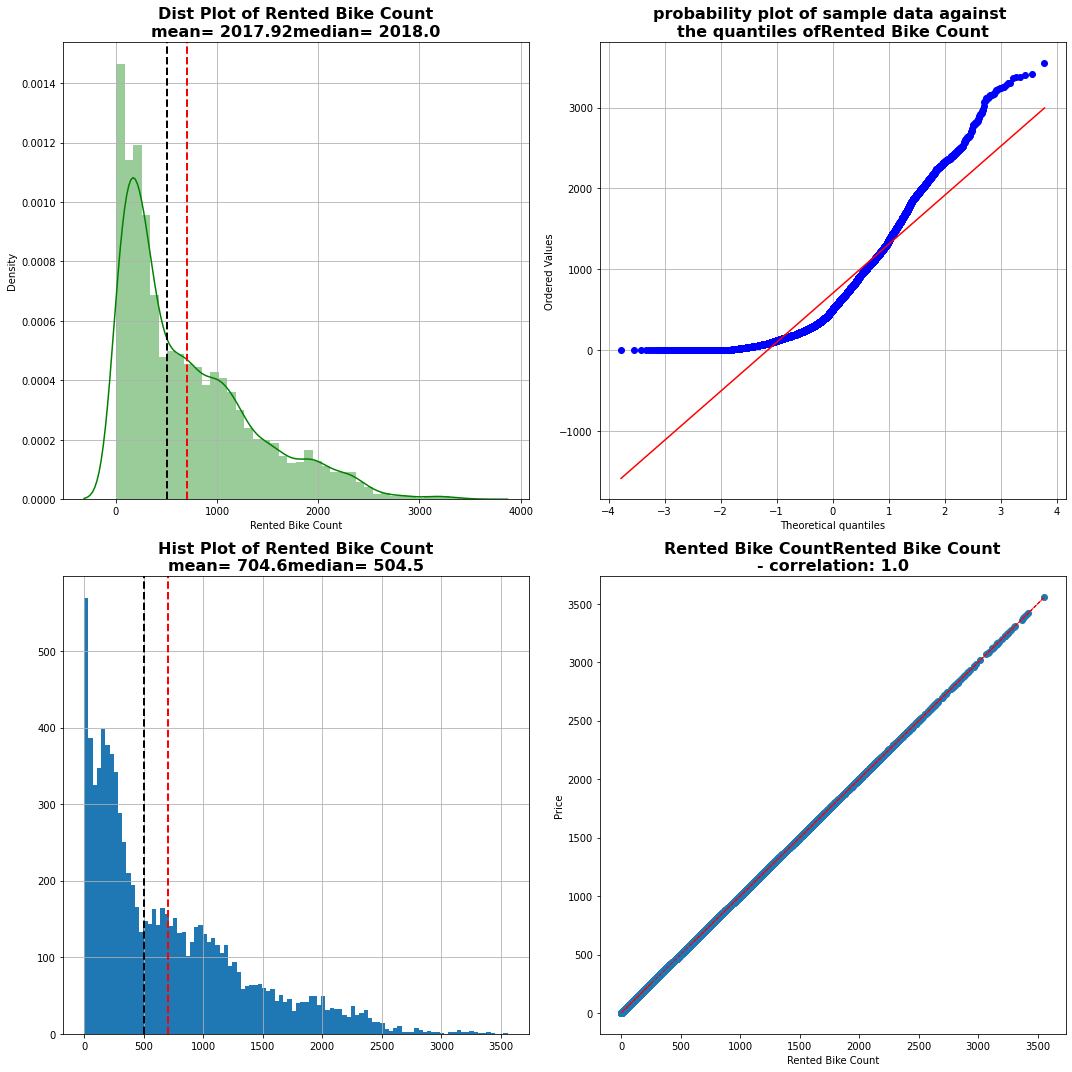



 Distribution and Bike Count Comparision Plot for Hour
------------------------------------------------------------------------------------------------------------------------------------------------------


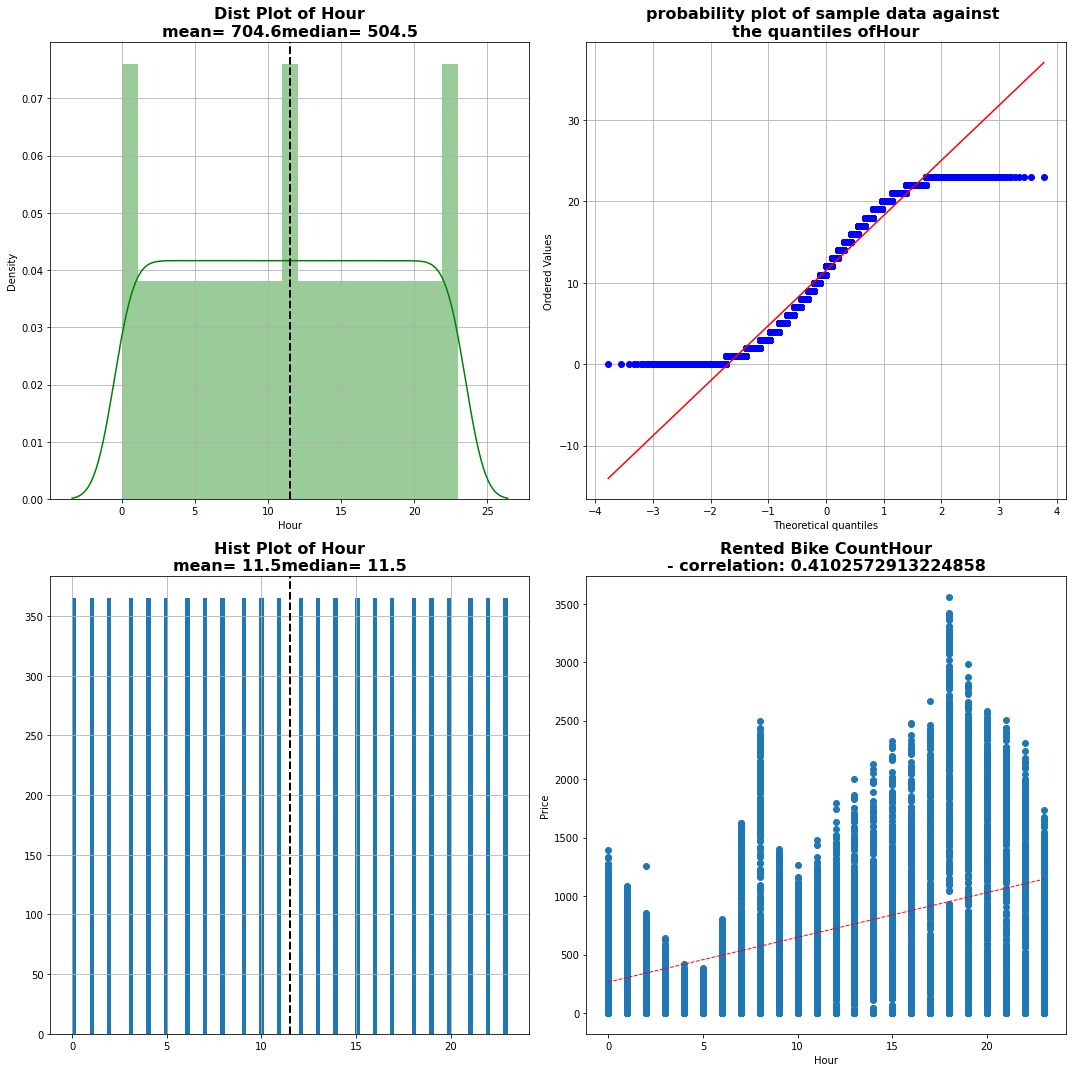



 Distribution and Bike Count Comparision Plot for Temperature(°C)
------------------------------------------------------------------------------------------------------------------------------------------------------


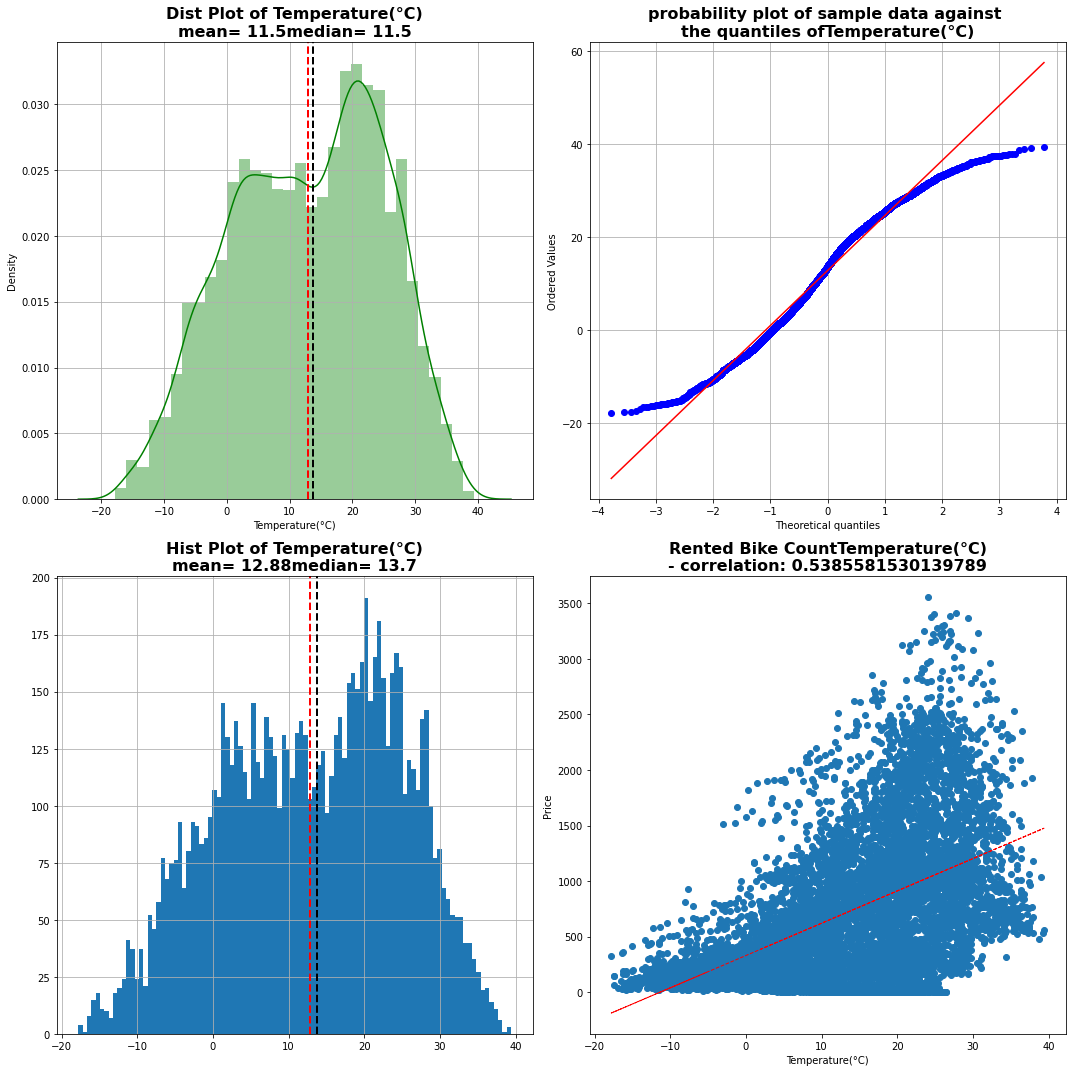



 Distribution and Bike Count Comparision Plot for Humidity(%)
------------------------------------------------------------------------------------------------------------------------------------------------------


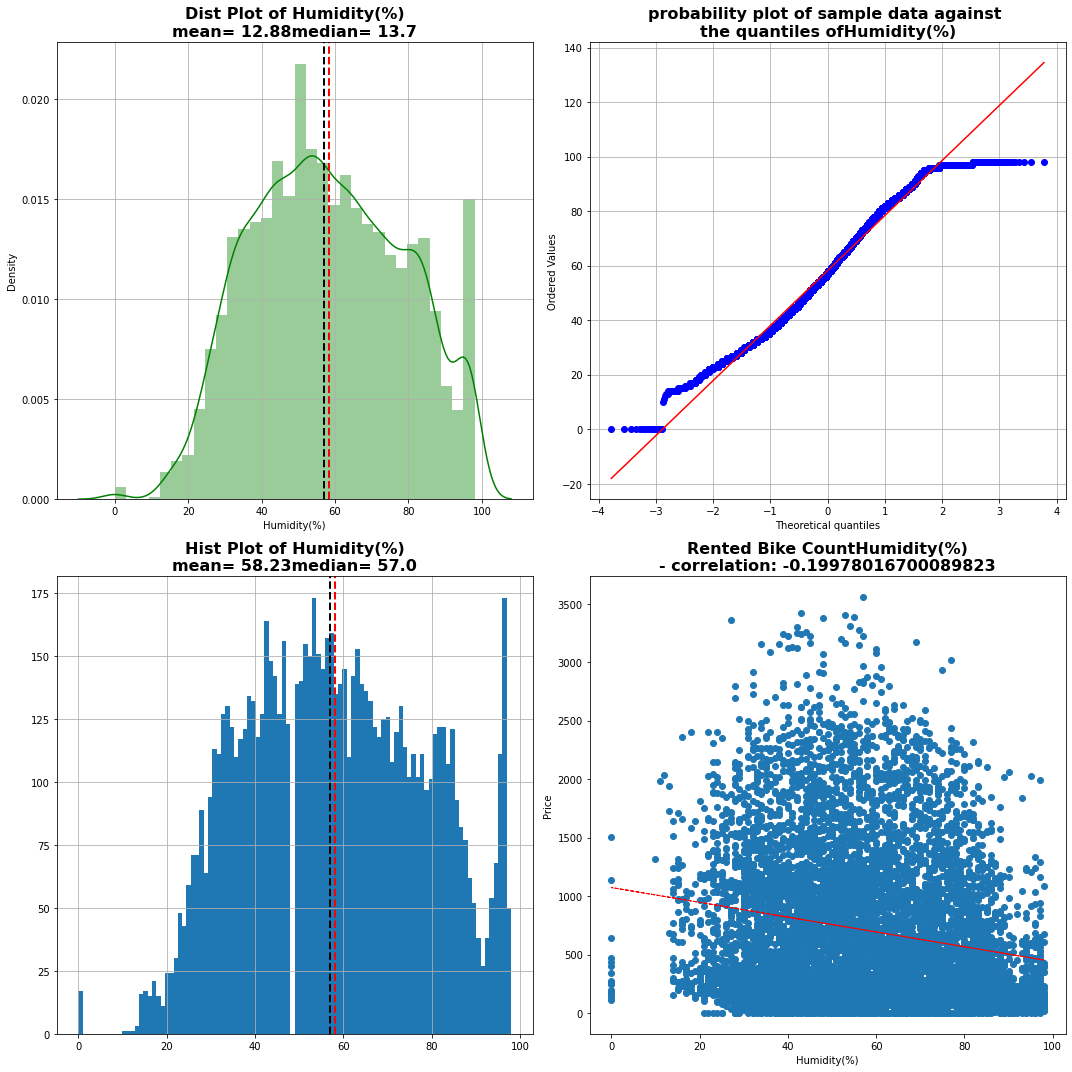



 Distribution and Bike Count Comparision Plot for Wind speed (m/s)
------------------------------------------------------------------------------------------------------------------------------------------------------


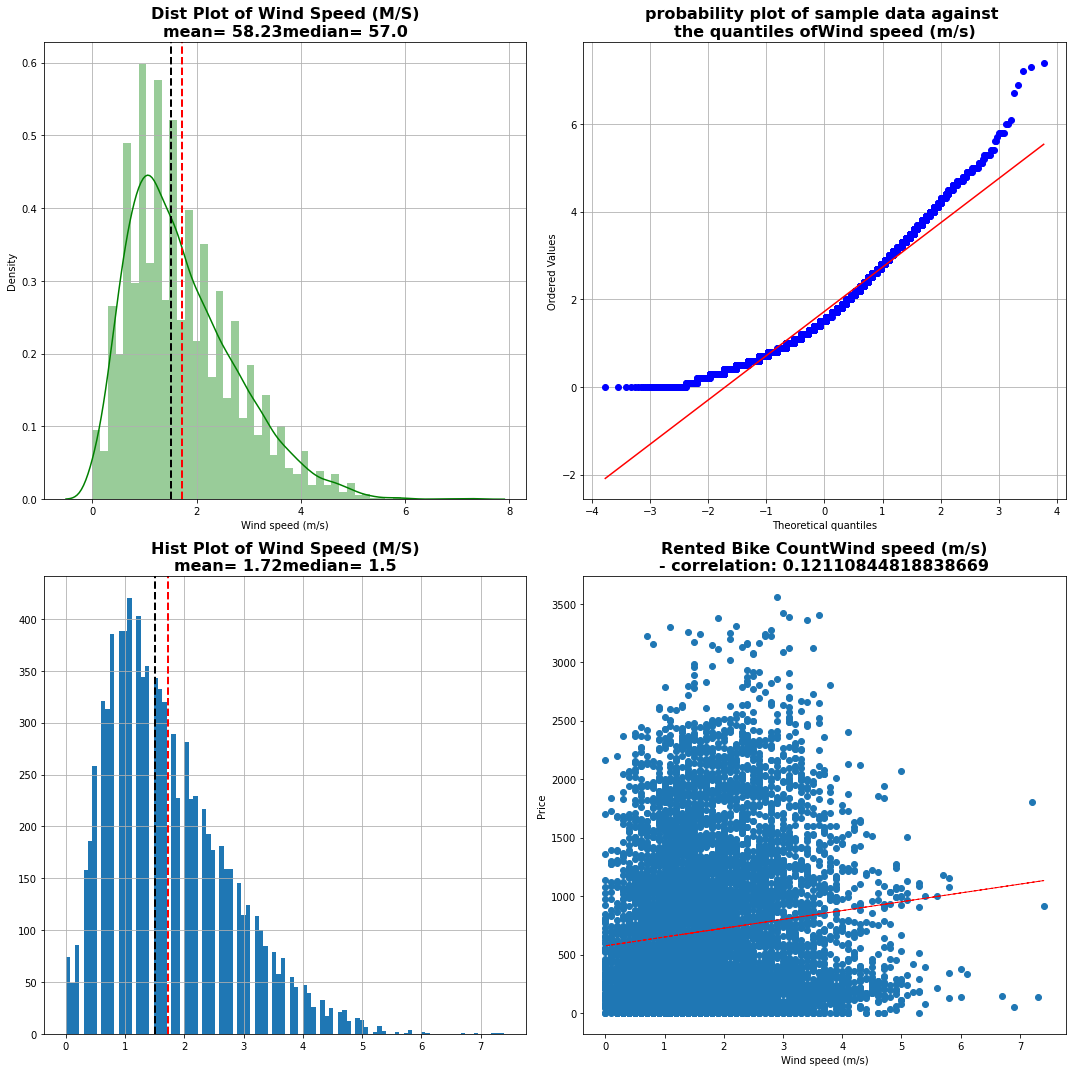



 Distribution and Bike Count Comparision Plot for Visibility (10m)
------------------------------------------------------------------------------------------------------------------------------------------------------


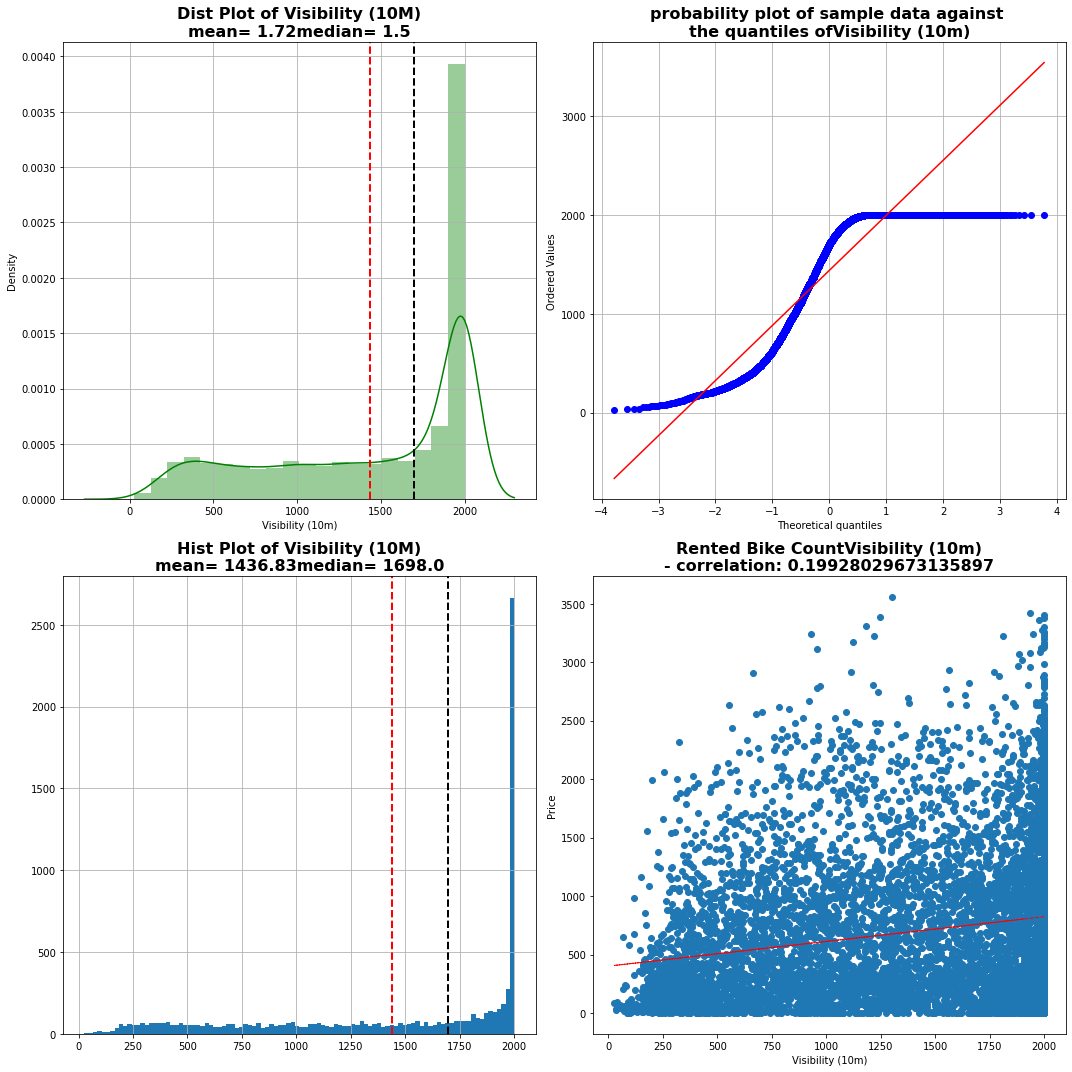



 Distribution and Bike Count Comparision Plot for Dew point temperature(°C)
------------------------------------------------------------------------------------------------------------------------------------------------------


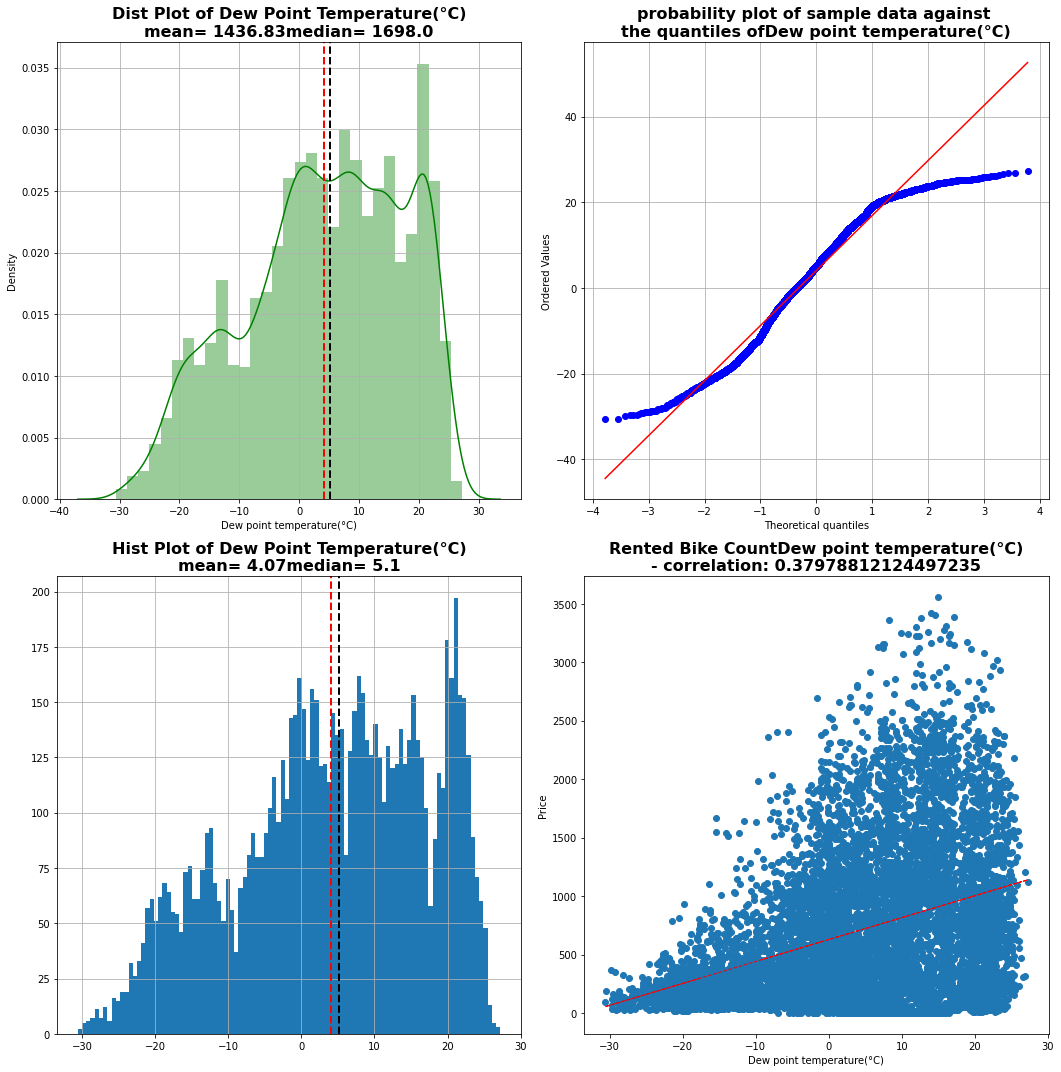



 Distribution and Bike Count Comparision Plot for Solar Radiation (MJ/m2)
------------------------------------------------------------------------------------------------------------------------------------------------------


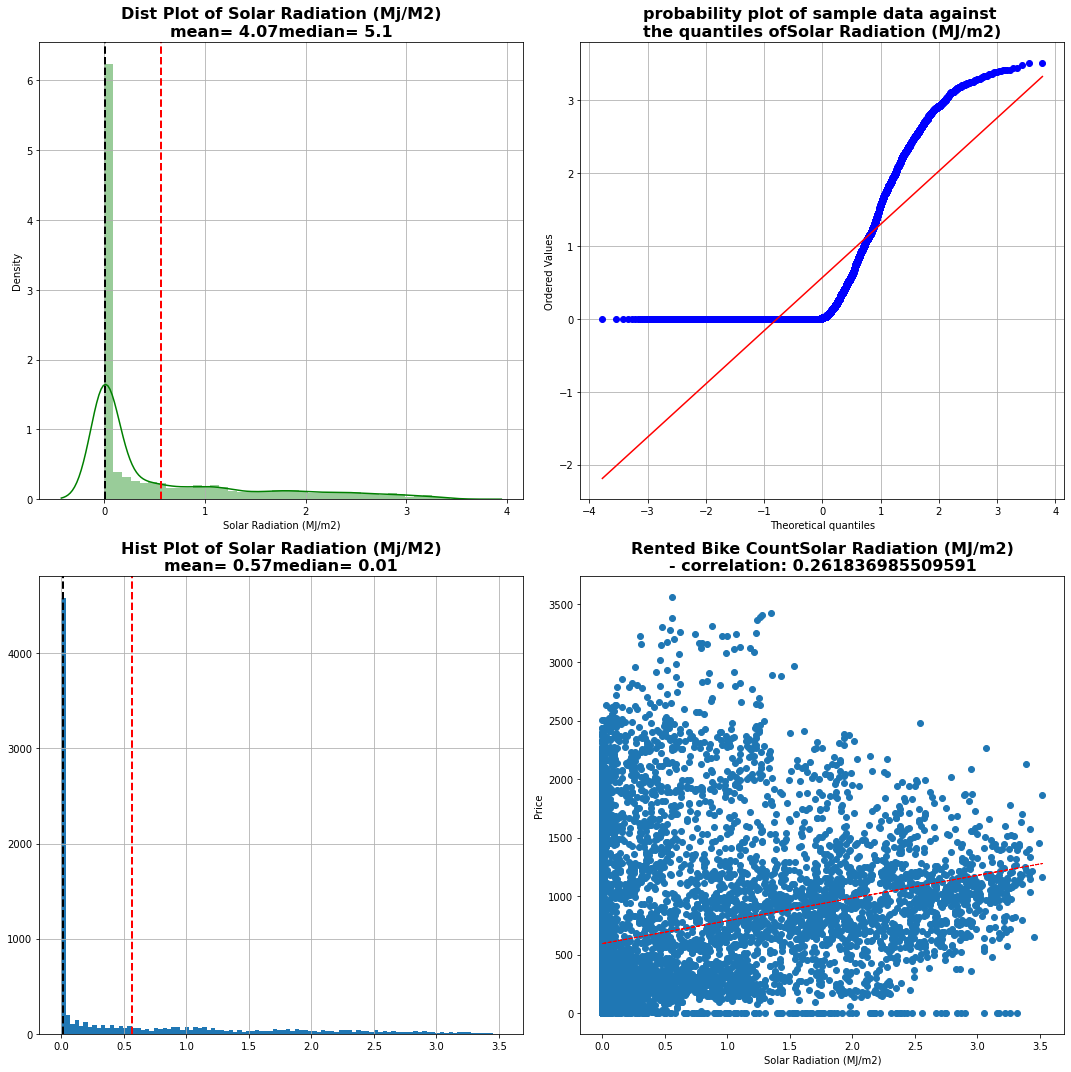



 Distribution and Bike Count Comparision Plot for Rainfall(mm)
------------------------------------------------------------------------------------------------------------------------------------------------------


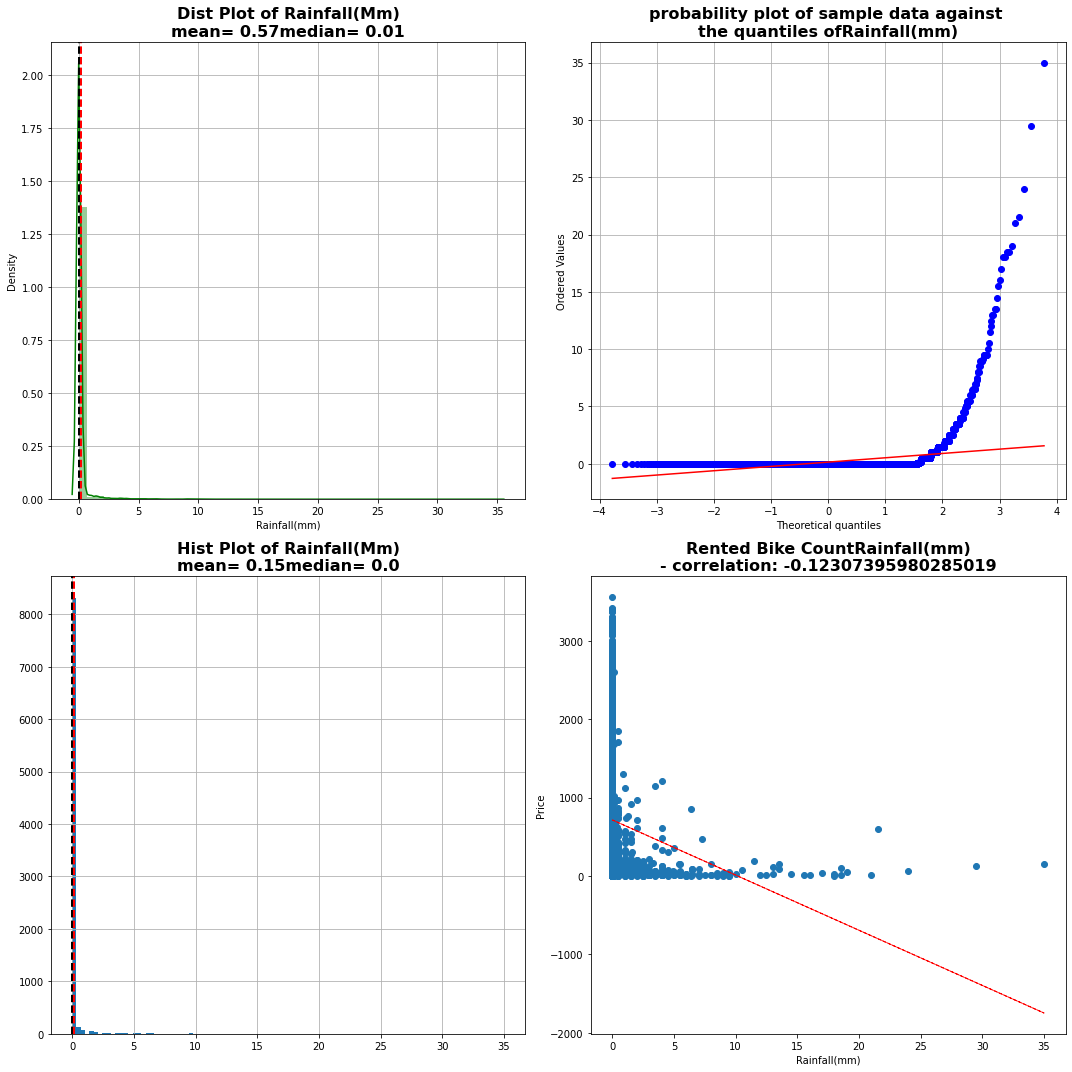



 Distribution and Bike Count Comparision Plot for Snowfall (cm)
------------------------------------------------------------------------------------------------------------------------------------------------------


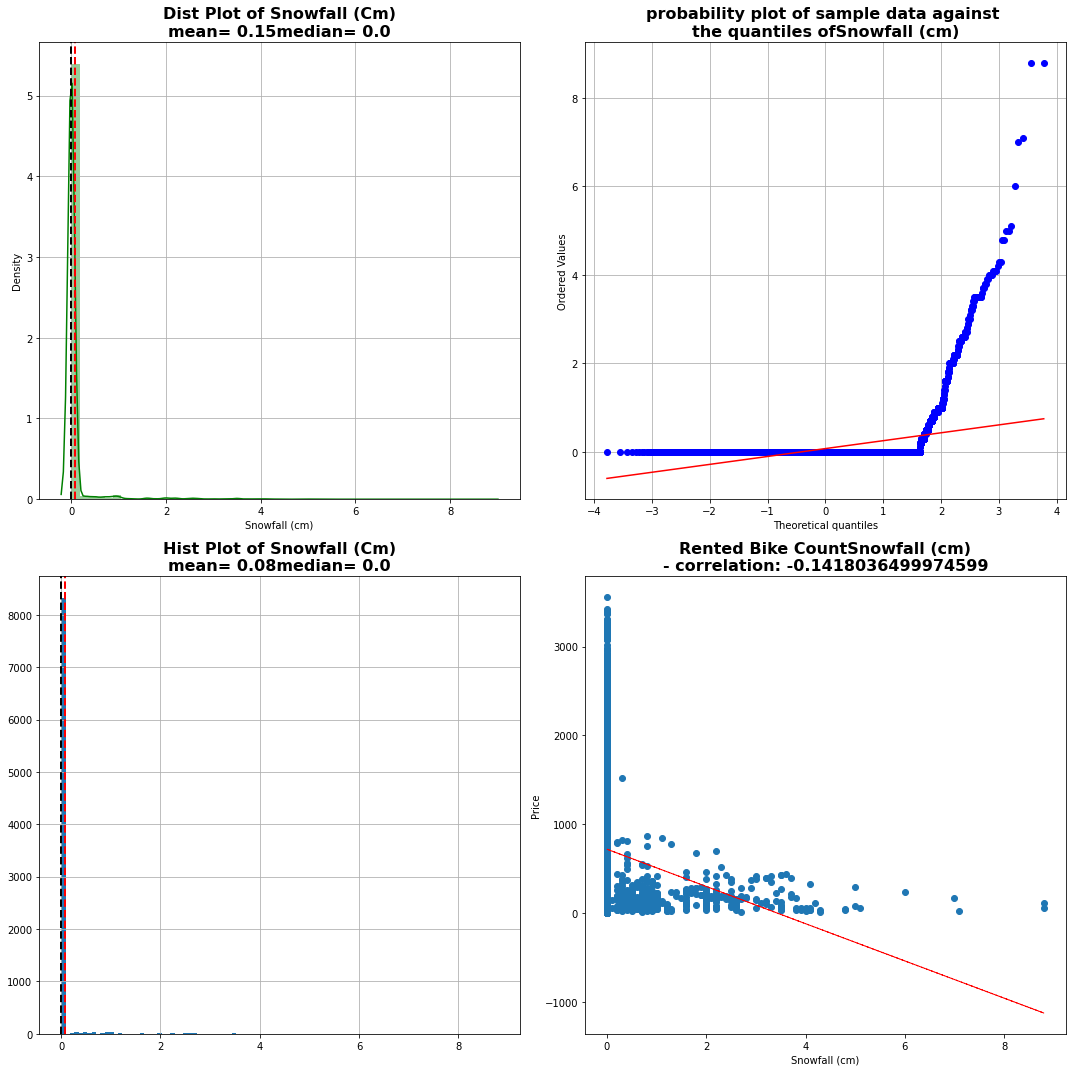



 Distribution and Bike Count Comparision Plot for day
------------------------------------------------------------------------------------------------------------------------------------------------------


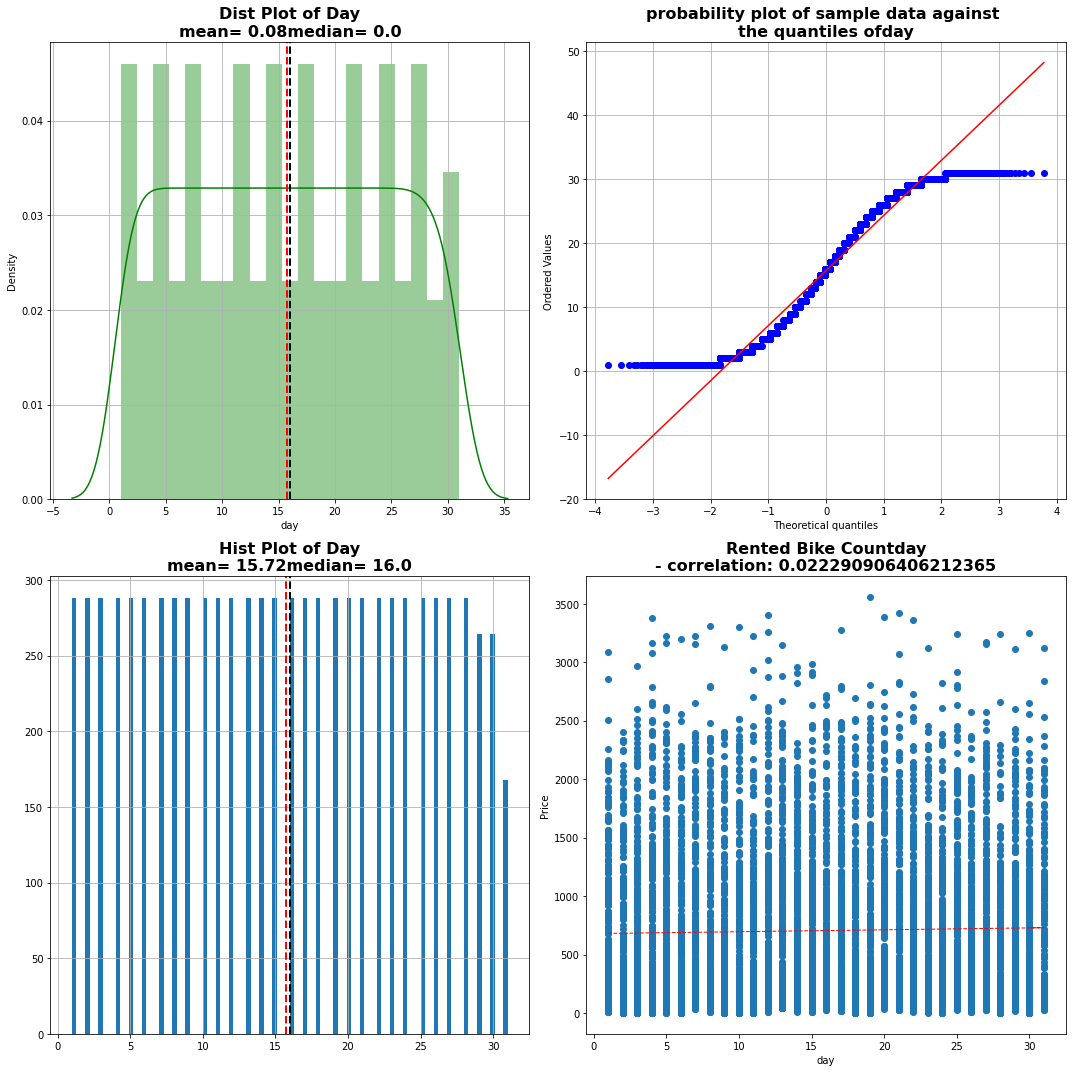



 Distribution and Bike Count Comparision Plot for month
------------------------------------------------------------------------------------------------------------------------------------------------------


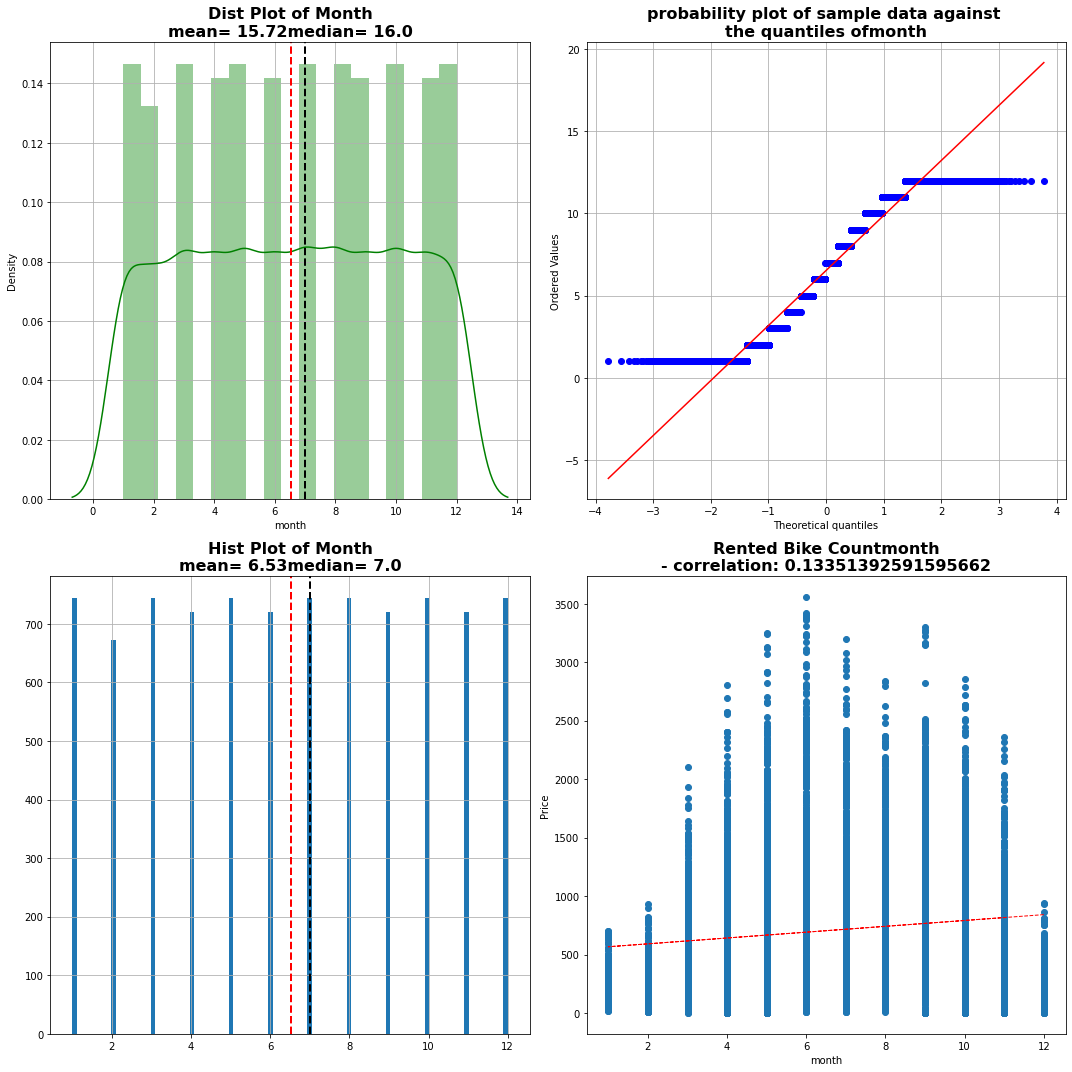



 Distribution and Bike Count Comparision Plot for year
------------------------------------------------------------------------------------------------------------------------------------------------------


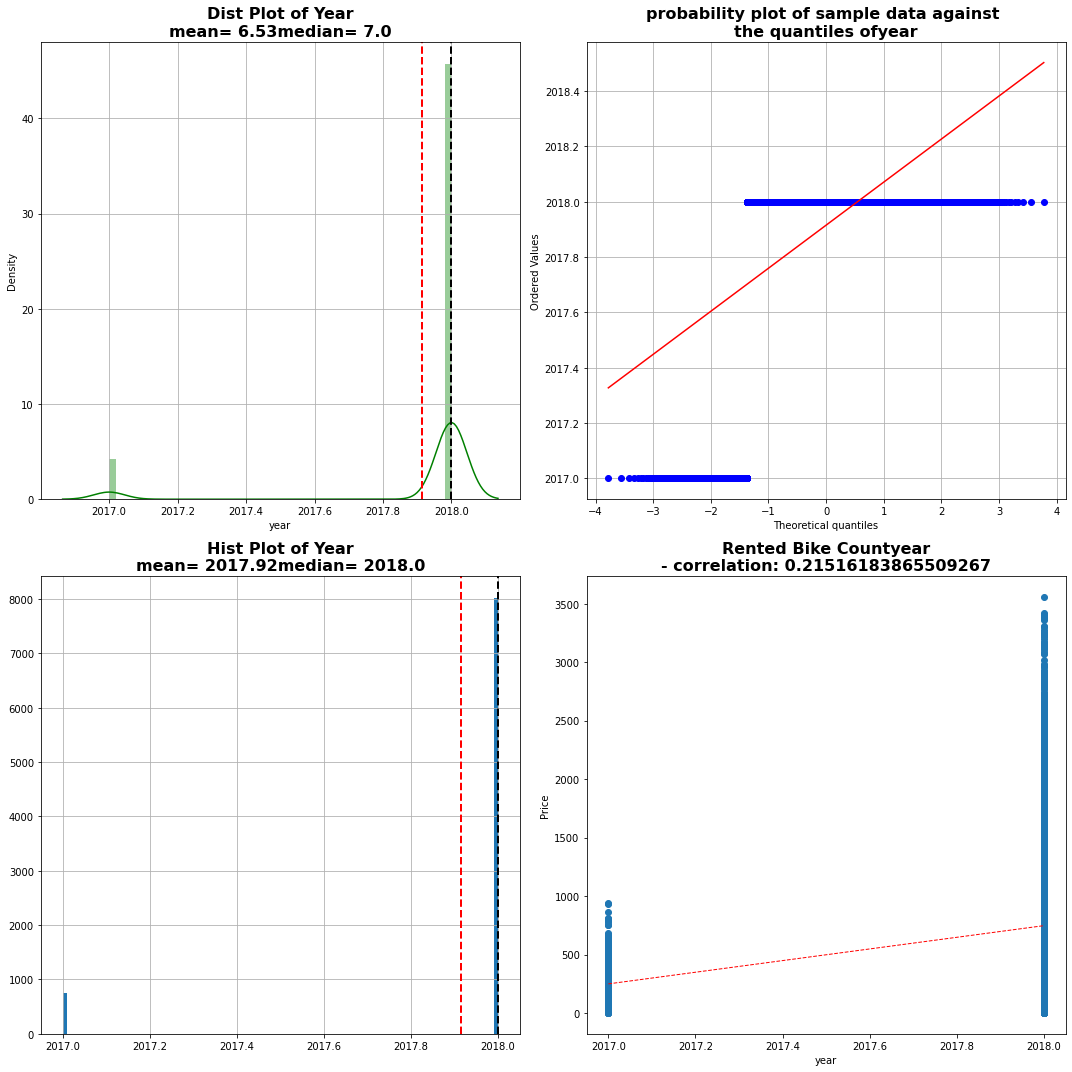

In [111]:
for col in Numeric_Features:
  print('\n')
  print('='*150,'\n',f'Distribution and Bike Count Comparision Plot for {col}')
  print('-'*150)

  
  plt.figure(figsize=(15,15))
  plt.title(f'Distribution and Bike Count Comparision Plot for feature column {col}',
            fontsize=20, fontweight='bold',color='m')

  #1# /-----------------------------------------------
  plt.subplot(2, 2, 1)   # Define 2 rows, 2 column, Activate subplot 1. 
  # Dependent Varible ''Rented Bike Count'
  plt.grid('on')
  sns.distplot(df[col],color="g")
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.title('Dist Plot of '+col.title()+'\n'+'mean= '+str(round(feature.mean(),2))+'median= '+str(round(feature.median(),2)), 
            fontsize=16, fontweight='bold')


  #2# /-----------------------------------------------
  plt.subplot(2, 2, 2)   # 2 rows, 2 column, Activate subplot 2.
  # plot some data here
  plt.grid('on')
  stats.probplot(df[col], dist='norm', fit=True, plot=plt)
  plt.title(f"probability plot of sample data against \nthe quantiles of{col}",fontsize=16, fontweight='bold')




  #3# /-----------------------------------------------
  plt.subplot(2, 2, 3)   # 2 rows, 2 column, Activate subplot 3.
  # plot some data here
  feature = df[col]
  feature.hist(bins=100) 
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='k', linestyle='dashed', linewidth=2)
  plt.title('Hist Plot of '+col.title()+'\n'+'mean= '+str(round(feature.mean(),2))+'median= '+str(round(feature.median(),2)),   
            fontsize=16, fontweight='bold')
  
  

  #4# /-----------------------------------------------
  plt.subplot(2, 2, 4)   # 2 rows, 2 column, Activate subplot 3.
  # plot some data here
  feature = df[col]
  label = df['Rented Bike Count']

  # To check Correlation of data with price
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.title('Rented Bike Count' + col + '\n- correlation: ' + str(correlation), fontsize=16, fontweight='bold')

  # Imply polyfit on feature
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)

  # to Prevent subplots overlap
  plt.tight_layout()  
  plt.show()


In [112]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')



 Count and Box Plot for Seasons
------------------------------------------------------------------------------------------------------------------------------------------------------


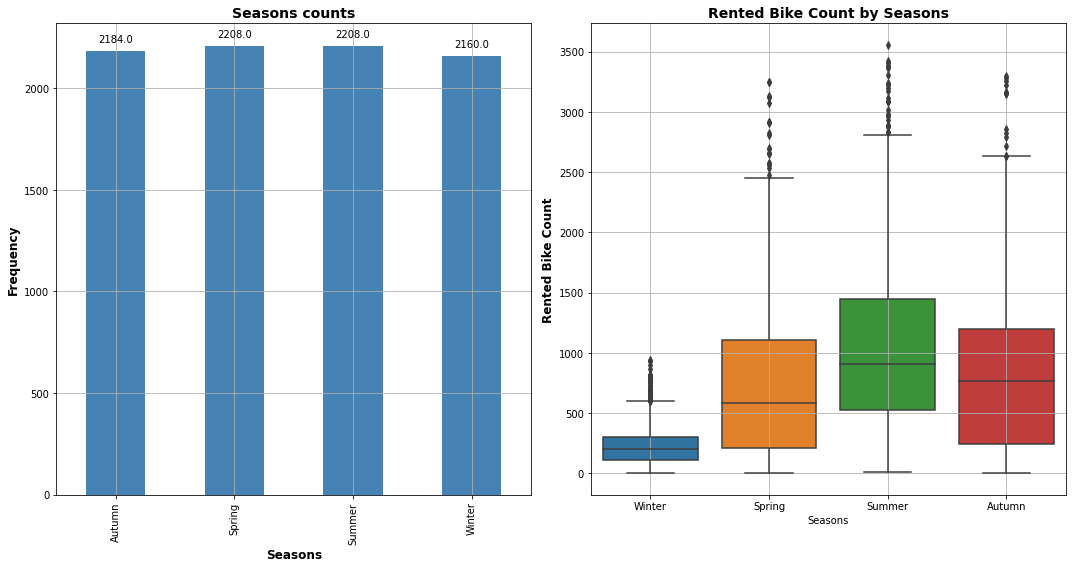



 Count and Box Plot for Holiday
------------------------------------------------------------------------------------------------------------------------------------------------------


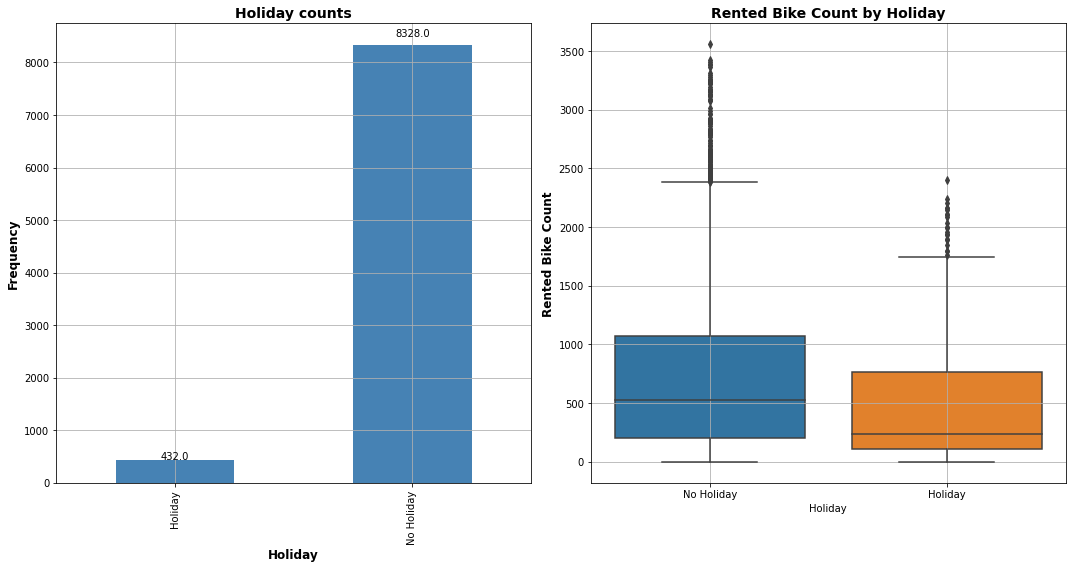



 Count and Box Plot for Functioning Day
------------------------------------------------------------------------------------------------------------------------------------------------------


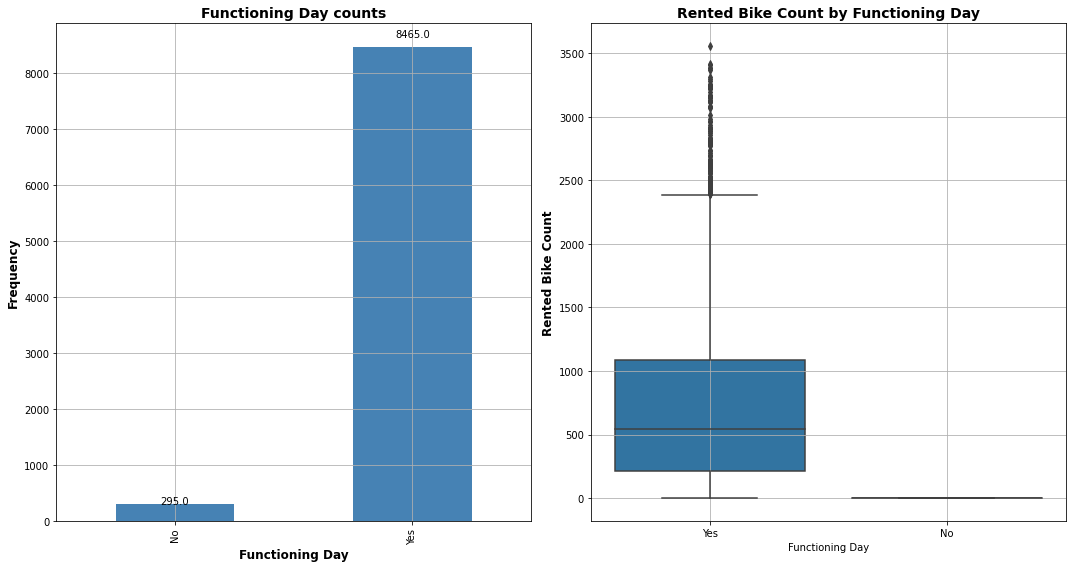

In [120]:
for col in categorical_features[0:]:

  print('\n')
  print('='*150,'\n',f'Count and Box Plot for {col}')
  print('-'*150)

  
  plt.figure(figsize=(15,8))
  plt.title(f'Count and Box Plot for {col}',
            fontsize=20, fontweight='bold',color='m')

  #1# /-----------------------------------------------
  plt.subplot(1, 2, 1)   # Define 2 rows, 2 column, Activate subplot 1. 
  # Dependent Varible ''Rented Bike Count'
  counts = df[col].value_counts().sort_index()
  couns_list = pd.DataFrame(counts).iloc[:,-1].values
  
  ax = counts.plot.bar(color='steelblue')
  plt.title(col + ' counts', fontsize=14, fontweight='bold')
  plt.xlabel(col,fontsize=12,fontweight='bold') 
  plt.ylabel("Frequency",fontsize=12,fontweight='bold')

  show_values(ax, orient="v", space=.02)
  plt.grid('on')

  #2# /-----------------------------------------------
  plt.subplot(1, 2, 2)   # 2 rows, 2 column, Activate subplot 2.
  # plot some data here
  sns.boxplot(data=df,y="Rented Bike Count",x=df[col],orient="v")
  plt.title('Rented Bike Count by ' + col, fontsize=14, fontweight='bold' )
  plt.ylabel("Rented Bike Count",fontsize=12,fontweight='bold')

  plt.grid('on')


  # to Prevent subplots overlap
  plt.tight_layout()  
  plt.show()



In [122]:
df["Date"] = data["Date"]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   int64

In [124]:
df_17 = df[df['year']==2017]
df_18 = df[df['year']==2018]

In [130]:
df_17['Date'].unique()

array(['01/12/2017', '02/12/2017', '03/12/2017', '04/12/2017',
       '05/12/2017', '06/12/2017', '07/12/2017', '08/12/2017',
       '09/12/2017', '10/12/2017', '11/12/2017', '12/12/2017',
       '13/12/2017', '14/12/2017', '15/12/2017', '16/12/2017',
       '17/12/2017', '18/12/2017', '19/12/2017', '20/12/2017',
       '21/12/2017', '22/12/2017', '23/12/2017', '24/12/2017',
       '25/12/2017', '26/12/2017', '27/12/2017', '28/12/2017',
       '29/12/2017', '30/12/2017', '31/12/2017'], dtype=object)

In [178]:
df_18['Date'].unique()

array(['01/01/2018', '02/01/2018', '03/01/2018', '04/01/2018',
       '05/01/2018', '06/01/2018', '07/01/2018', '08/01/2018',
       '09/01/2018', '10/01/2018', '11/01/2018', '12/01/2018',
       '13/01/2018', '14/01/2018', '15/01/2018', '16/01/2018',
       '17/01/2018', '18/01/2018', '19/01/2018', '20/01/2018',
       '21/01/2018', '22/01/2018', '23/01/2018', '24/01/2018',
       '25/01/2018', '26/01/2018', '27/01/2018', '28/01/2018',
       '29/01/2018', '30/01/2018', '31/01/2018', '01/02/2018',
       '02/02/2018', '03/02/2018', '04/02/2018', '05/02/2018',
       '06/02/2018', '07/02/2018', '08/02/2018', '09/02/2018',
       '10/02/2018', '11/02/2018', '12/02/2018', '13/02/2018',
       '14/02/2018', '15/02/2018', '16/02/2018', '17/02/2018',
       '18/02/2018', '19/02/2018', '20/02/2018', '21/02/2018',
       '22/02/2018', '23/02/2018', '24/02/2018', '25/02/2018',
       '26/02/2018', '27/02/2018', '28/02/2018', '01/03/2018',
       '02/03/2018', '03/03/2018', '04/03/2018', '05/03

In [180]:
df['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
# correlation = feature.corr(label)
#   plt.scatter(x=feature, y=label)

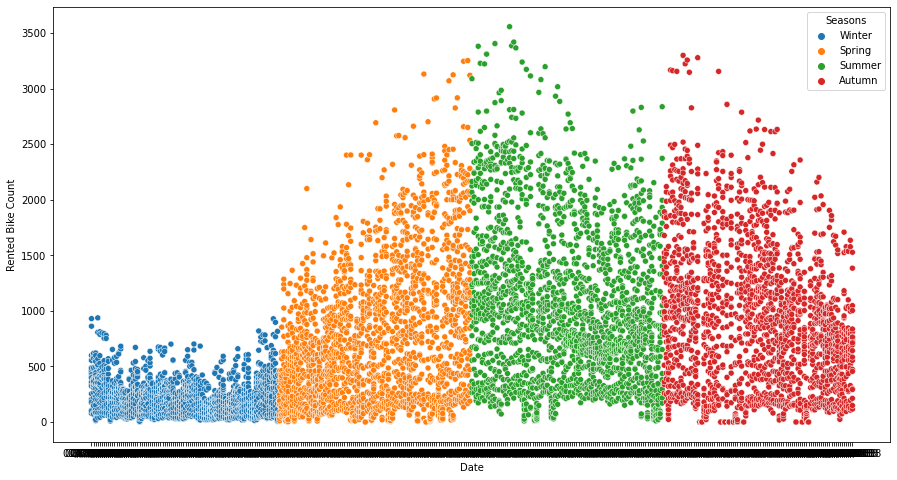

In [146]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Seasons")


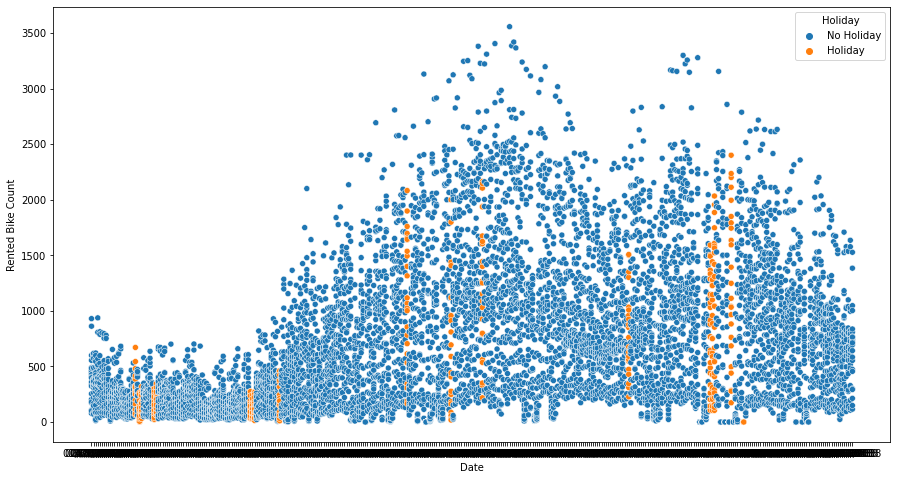

In [168]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Holiday")

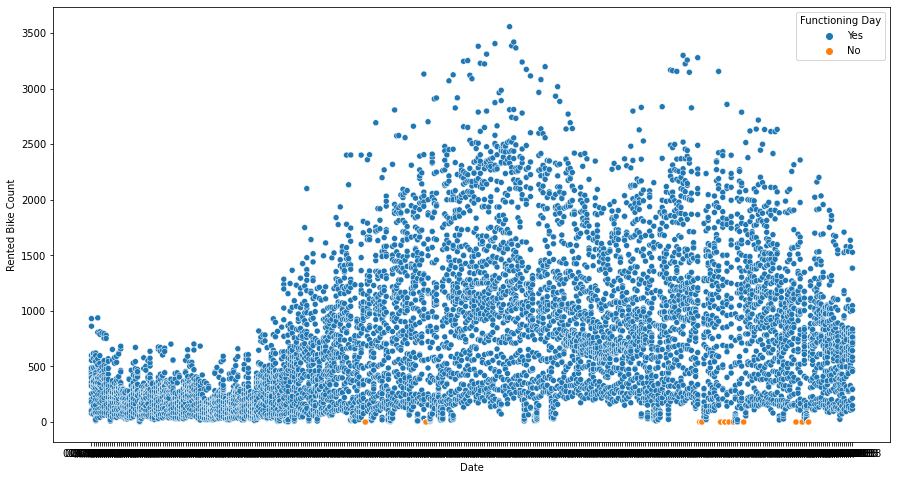

In [169]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Functioning Day")

In [174]:
df[df["Functioning Day"]=='No']['Rented Bike Count'].value_counts()

0    295
Name: Rented Bike Count, dtype: int64

In [185]:
df['Month'] = df['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

In [187]:
df['Month -> Season'] = df['Month']+ '-> '+ df['Seasons']

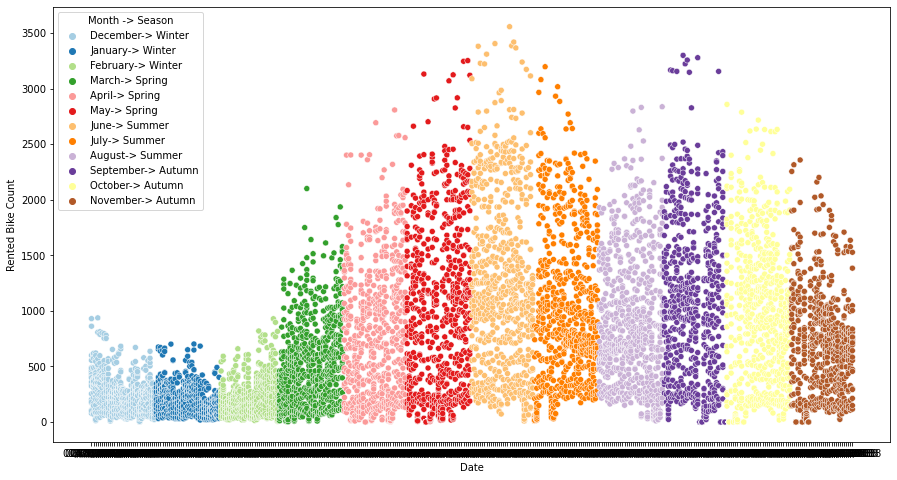

In [188]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Month -> Season", palette='Paired')

Average Count

In [193]:
Average_Bike_Count_by_Month = df.groupby("Month -> Season")['Rented Bike Count'].mean()

In [231]:
Average_Bike_Count_by_Hour = df.groupby("Hour","Season")['Rented Bike Count'].mean()

ValueError: ignored

KeyError: ignored

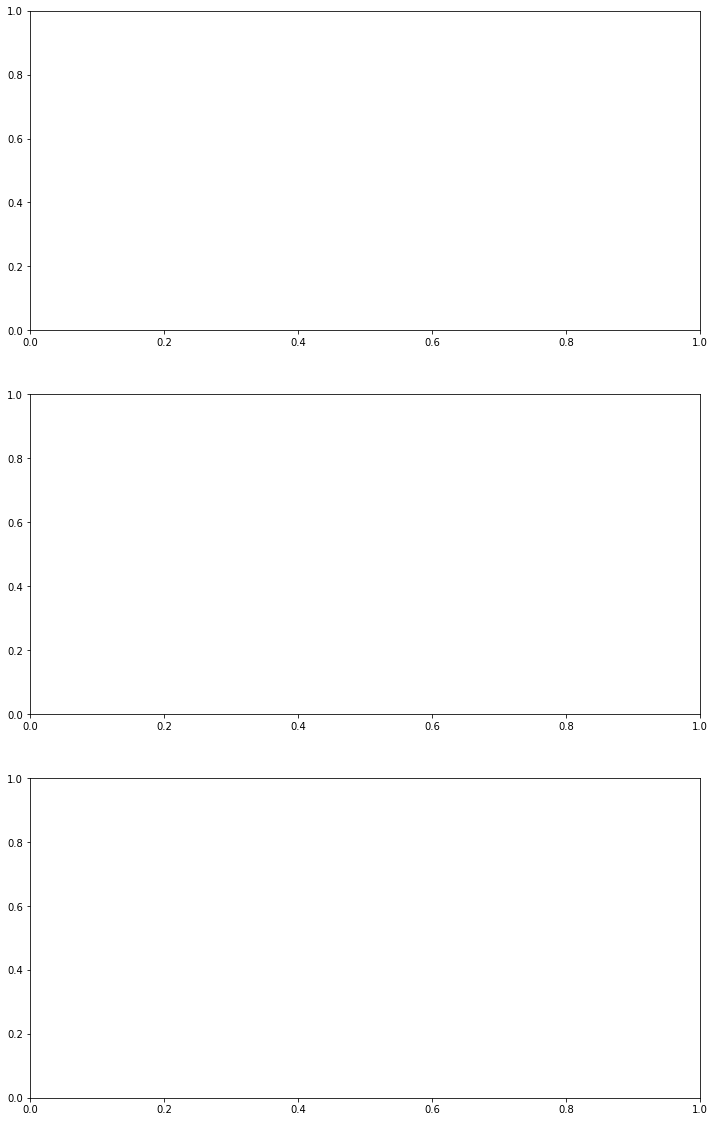

In [229]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(12,20)

hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(df.groupby(["Hour","Season"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["Hour"], y=hourAggregated["Rented Bike Count"],hue=hourAggregated["Season"], data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df.groupby(["Hour","weekday"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["Hour"], y=hourAggregated["Rented Bike Count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')


In [202]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year', 'Date', 'Month',
       'Month -> Season'],
      dtype='object')

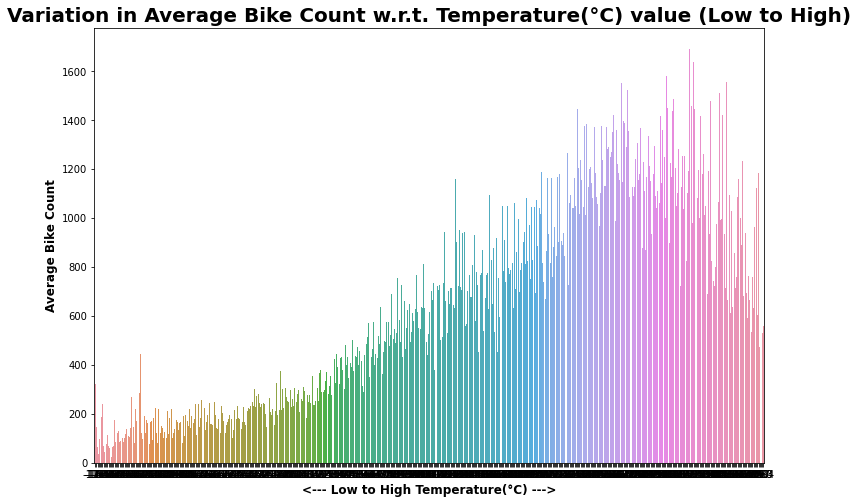

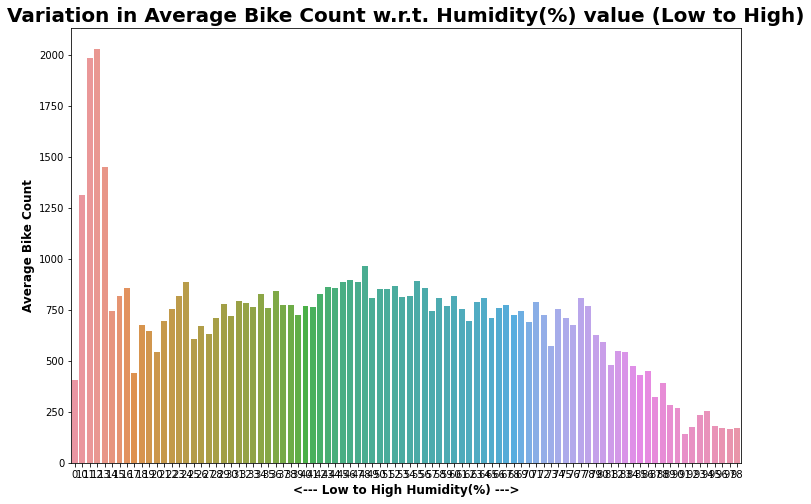

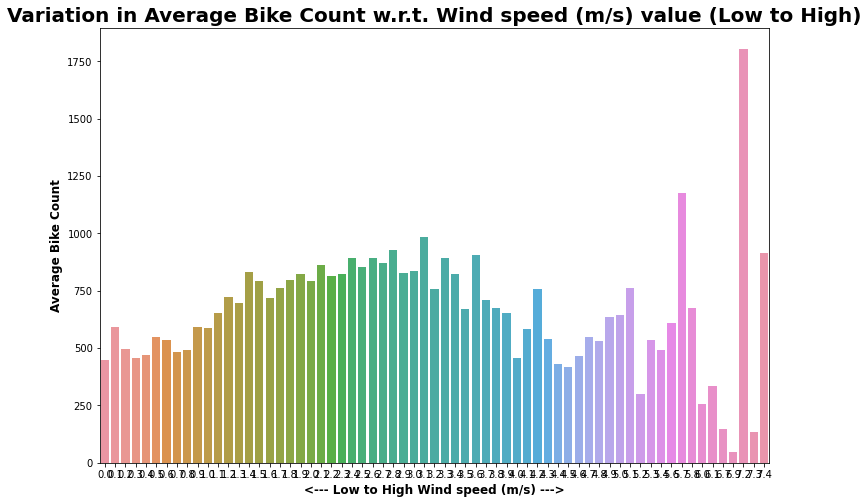

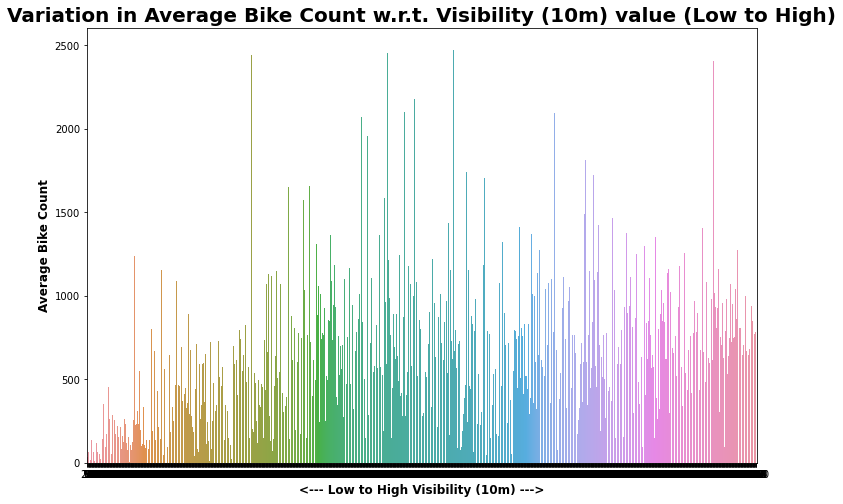

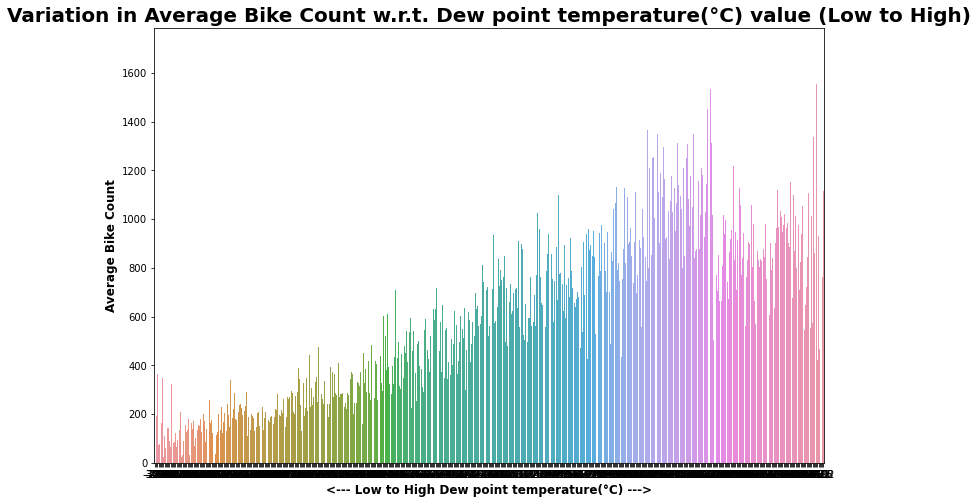

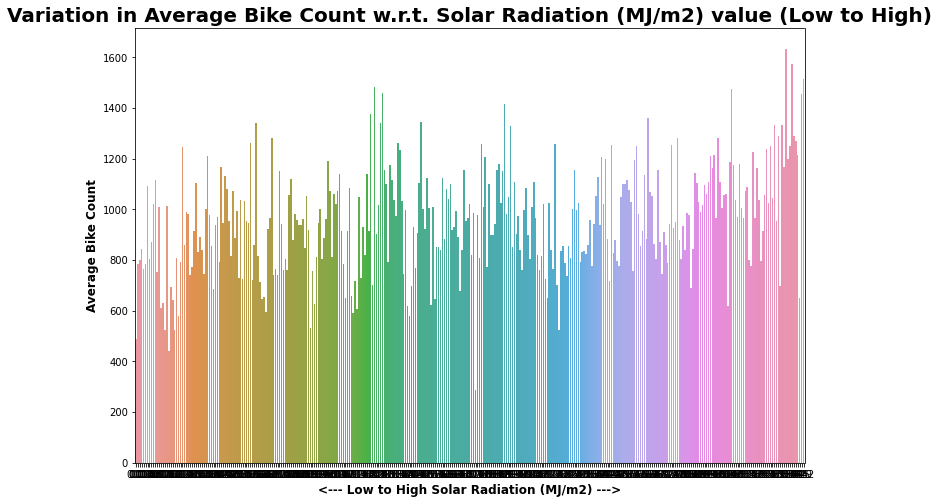

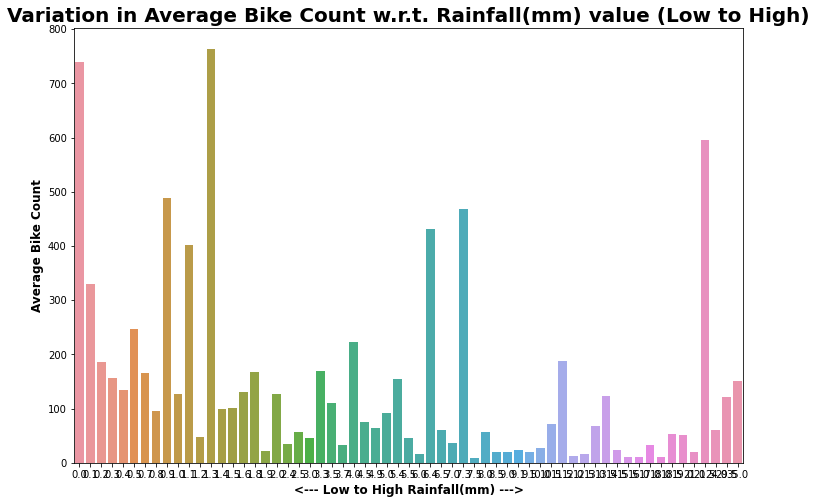

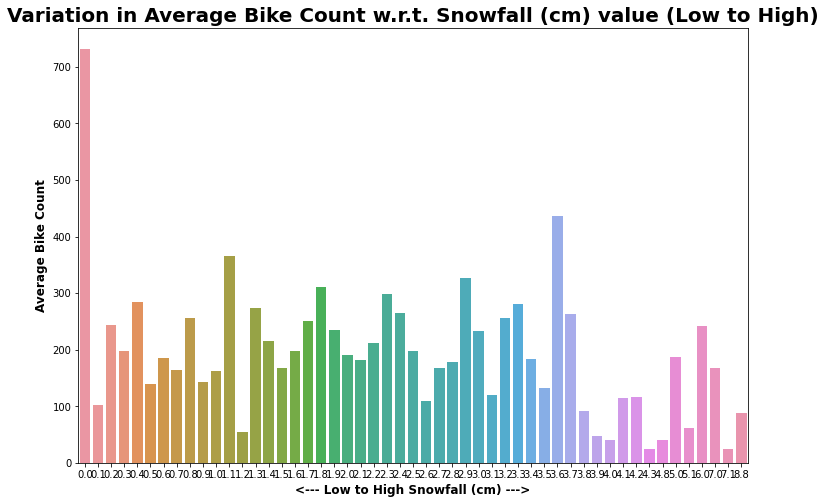

In [218]:
avg_count_by_list = ['Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 
                     'Visibility (10m)', 'Dew point temperature(°C)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in avg_count_by_list:
  print('\n')
  print('='*150)
  print(f'Variation in Average Bike Count w.r.t. {col} value (Low to High)')
  print('-'*150)
  plt.figure(figsize=(12,8))
  sns.barplot(x=df.groupby(col)['Rented Bike Count'].mean().sort_values().index,
              y=df.groupby(col)['Rented Bike Count'].mean().sort_values().values)
  plt.title(f'Variation in Average Bike Count w.r.t. {col} value (Low to High)', size=20, weight='bold')
  plt.xlabel(f"<--- Low to High {col} --->", size=12, weight='bold')
  plt.ylabel("Average Bike Count", size=12, weight='bold')

In [203]:
df.groupby("Temperature(°C)")['Rented Bike Count'].mean().sort_values().values

array([  24.5       ,   36.        ,   46.        ,   60.33333333,
         63.83333333,   64.        ,   67.66666667,   69.5       ,
         70.        ,   75.5       ,   77.8       ,   79.        ,
         81.1       ,   81.33333333,   84.5       ,   86.5       ,
         87.        ,   90.        ,   91.71428571,   96.        ,
         97.66666667,   99.5       ,   99.57142857,  100.        ,
        100.5       ,  102.11111111,  103.        ,  105.        ,
        106.        ,  110.        ,  110.25      ,  113.        ,
        114.        ,  117.        ,  119.33333333,  120.4       ,
        120.5       ,  121.        ,  121.9       ,  122.33333333,
        123.4       ,  123.4       ,  123.5       ,  126.42857143,
        132.        ,  134.91666667,  135.88888889,  136.        ,
        136.66666667,  137.44444444,  138.66666667,  139.66666667,
        141.        ,  141.1       ,  143.75      ,  144.07142857,
        144.63636364,  144.8       ,  145.08333333,  145.5    

Text(0, 0.5, 'Average Bike Count')

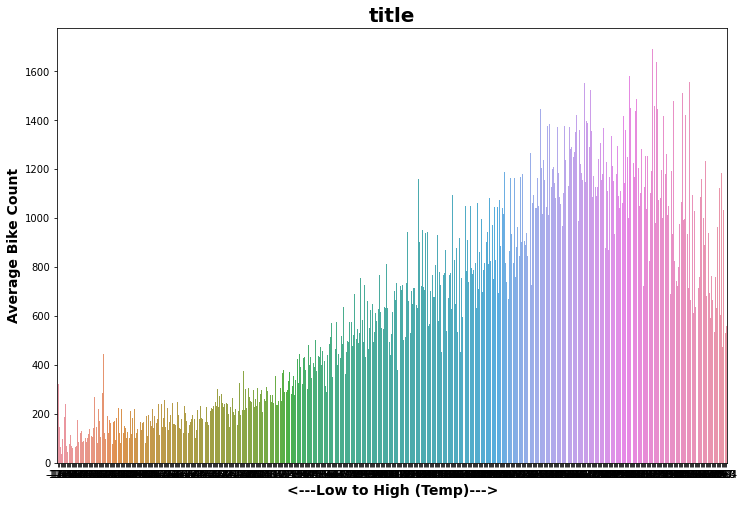

In [217]:
plt.figure(figsize=(12,8))
sns.barplot(x=df.groupby("Temperature(°C)")['Rented Bike Count'].mean().sort_values().index,
            y=df.groupby("Temperature(°C)")['Rented Bike Count'].mean().sort_values().values)
plt.title('Variation in Average Bike Count By {} value Low to High', size=20, weight='bold')
plt.xlabel("<---Low to High (Temp)--->", size=14, weight='bold')
plt.ylabel("Average Bike Count", size=14, weight='bold')

In [198]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
day                            31
month                          12
year                            2
Date                          365
Month                          12
Month -> Season                12
dtype: int64

In [17]:
# object_list = ['Seasons', 'Holiday', 'Functioning Day']
# for i in object_list:
#   print('-'*50,f"\nUnique Values in '{i}' column:-\n",df[i].unique(),'\n\n')

-------------------------------------------------- 
Unique Values in 'Seasons' column:-
 ['Winter' 'Spring' 'Summer' 'Autumn'] 


-------------------------------------------------- 
Unique Values in 'Holiday' column:-
 ['No Holiday' 'Holiday'] 


-------------------------------------------------- 
Unique Values in 'Functioning Day' column:-
 ['Yes' 'No'] 




In [18]:
# le = LabelEncoder()
# # Encode labels of multiple columns at once
# df[object_list] = df[object_list].apply(le.fit_transform)
# # Print head
# df.head()